# Handin 2

A signal of the form
    
    y(x)=8cos(x)-3sin(7x)
is sent by a cable and disrupted by noise. We wish to alter the signal, which is recieved so as to minimize the noise.

In [1]:
import numpy as np

def y(x): # y(x) implemented in python
    return 8 * np.cos(x) - 3 * np.sin(7*x)

#### (a) Plot the function over the interval [0,9]

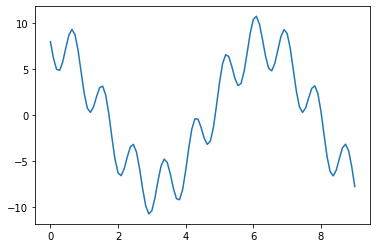

In [2]:
import matplotlib.pyplot as plt

xMin = 0
xMax = 9
n   = 100

x = np.linspace(xMin, xMax, n)

fig, ax = plt.subplots()
ax.plot(x, y(x))

#### (b) Use the following snippet to add noise and plot the result.

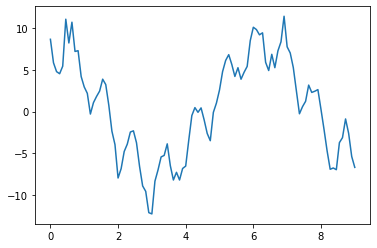

In [3]:
rng = np.random.default_rng()
noise = rng.standard_normal(n)

y_noisy = y(x) + noise

fig, ax = plt.subplots()
ax.plot(x, y_noisy)

#### (c) Create a matrix with 1/3's in the diagonals, using diag() and ones()

In [4]:
def thirdsDiag(n): # Returns a n*n matrix with 1/3 in the diagonal
    # Create 2 vectors with all ones.
    v_1 = np.ones((1,n-1)) # Remove one to fit in the matrix
    v_2 = np.ones((1,n  ))

    # Make the vectors into diagonals
    r_1 = np.diag(v_1[0], 1)
    r_2 = np.diag(v_2[0], 0)
    r_3 = np.diag(v_1[0], -1)
    
    # Add the diagonals together and perform scalar multiplication
    return (r_1+r_2+r_3)*(1/3)

print(thirdsDiag(5))

[[0.33333333 0.33333333 0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.         0.        ]
 [0.         0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         0.33333333 0.33333333]]


### (d) Plot $Ay_{noisy}$. Why is it closer to $y$ than to $y_{noisy}$? 

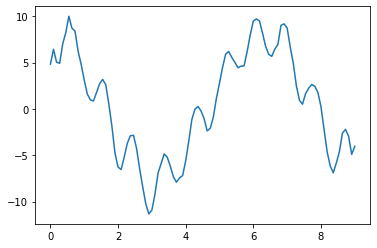

In [5]:
A = thirdsDiag(n)
Ay_noisy = A@(y(x) + noise)

fig, ax = plt.subplots()
ax.plot(x, Ay_noisy)

#### Why is it closer to $y$ than $y_{noise}$?

First we will expand the result to

$$A\cdot y_{noise} = A(y+noise) = Ay + Anoise$$


Now we'll take a look at the right hand side $Ay + Anoise$

More specificially we'll discuss the $noise$. $noise$ is a series of $n$ values picked from a normal distribution with mean $\mu = 0$ 

The result of this is that 
$$\lim_{n\to \infty}\sum_{i=0}^{n-1} noise[i] = 0$$

Now suppose we pick a value in position $k$ and let $noise[k]$ be some value $x_{k}$.
Now lets suppose we pick the values adjecent from it $x_{k-1}$ and $x_{k+1}$ and take the sum of them 
$$\sum_{i=k-1}^{k+1} noise[i]$$
Assuming the values, when generated, are picked independently this sum approaches $0$ as the amount of adjecent values are picked

Consider the matrix $m$
$$m=\begin{bmatrix}
x1 &x2 &x3 &x4 &x5\\
y1 &y2 &y3 &y4 &y5\\
z1 &z2 &z3 &z4 &z5\\
w1 &w2 &w3 &w4 &w5\\
k1 &k2 &k3 &k4 &k5\\
\end{bmatrix}$$

and the diagonal matrix $A$

$$A = \begin{bmatrix}
\frac{1}{3} &\frac{1}{3} &0 &0 &0\\
\frac{1}{3} &\frac{1}{3} &\frac{1}{3} &0 &0\\
0 &\frac{1}{3} &\frac{1}{3} &\frac{1}{3} &0\\
0 &0 &\frac{1}{3} &\frac{1}{3} &\frac{1}{3}\\
0 &0 &0 &\frac{1}{3} &\frac{1}{3}\\
\end{bmatrix}$$

Then the product $Am$ is

$$ = \frac{1}{3}\begin{bmatrix}
x1+y1& x2+y2 &x3+y3 &x4+y4 &x5+y5 \\
x1 + y1 + z1 &x2 + y2 + z2 &x3 + y3 + z3 &x4 + y4 + z4 &x5 + y5 + z5\\
y1 + z1 + w1 &y2 + z2 + w2 &y3 + z3 + w3 &y4 + z4 + w4 &y5 + z5 + w5\\
z1 + w1 + k1 &z2 + w2 + k2 &z3 + w3 + k3 &z4 + w4 + k4 &z5 + w5 + k5\\
w1 + k1 &w2 + k2 &w3 + k3 &w4 + k4 &w5 + k5
\end{bmatrix}$$

As we can see the matrix product $Am$ equates to our adjecent value picking. As each entry in the matrix is the sum of the neighbouring values.
And as the 'thickness' of the diagonal matrix increases, the expected value of each entry in $Am$ is expected to converge to the mean of the random values $\mu=0$, however as the values are independent, we converge faster than Ay

As for Ay we have to consider that the values are not independent of eachother.

Therefore as we narrow or widen the diagonal in A we either approach sum of $y(x_0), \forall x_0\in x$ as we widen the diagonal or approach the value of $y(x_0)$, where $x_0$ in some close continous region.

In conclusion, as we are averaging the noise, it converges towards to 0, and as we are averaging the signal, we recieves the same signal, but with slightly lower amplitude.

### (e) By altering A, we may achieve a better level of noise reduction. Find an example B where $By_{noise}$ has a better noise reduction than $Ay_{noise}$

The answer to this depends on the definition of noise reduction. Visually at least i would say that $By_{noise}$ has a better noise reduction when $B = A^2$, as the remaining jaggedness disappears.


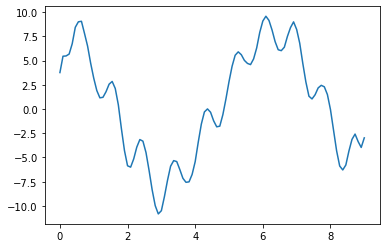

In [9]:
fig, ax = plt.subplots()
ax.plot(x, (A@A)@y_noisy)